## Goal
The goal of collecting this dataset is to analyze factors contributing to students stress levels using data mining techniques such as classification and clustering. This involves gathering information on variables like study load, bullying, self-esteem, mental health history, and other relevant factors. The dataset aims to provide a deeper understanding of how different stressors affect students and to uncover patterns that can guide schools in developing effective strategies and support systems to reduce student stress and enhance overall academic success.

## Soure of the Dataset
https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis

## General information about the dataset
The dataset contains 21 attributes and 1,100 objects. The attributes are divided into 5 major factors with a focus on student stress levels: Psychological, Physiological, Social, Environmental, and Academic. The types of attributes are all ordinal except for mental_health_history, which is a binary attribute.

Attribute Explanations:

1- Psychological Factors:<br>
● anxiety_level (0-21): An ordinal attribute that measures student’s anxiety severity. 0–4: Minimal anxiety, 5–9: Mild anxiety, 10–14: Moderate anxiety, 15–21: Severe anxiety.<br>
● self_esteem (0-30): An ordinal attribute that reflects student’s self-worth. 0–15: Low self-esteem, 16–25: Normal self-esteem, 26–30: High self-esteem.<br>
● mental_health_history (0-1): An asymmetric binary attribute that indicates if a student has a history of mental health issues (1) or not (0).<br>
● depression (0-27):  An ordinal attribute that assesses the severity of depressive symptoms. 0–4: Minimal depression, 5–9: Mild depression, 10–14: Moderate depression, 15–19: Moderately severe depression, 20–27: Severe depression.<br>

2- Physiological Factors:<br>
● headache (0-5): An ordinal attribute that measures frequency or intensity of headaches. Higher values indicate more headaches.<br>
● blood_pressure (1-3): An ordinal attribut that categorizes blood pressure levels, such as low (1), normal (2), or high (3).<br>
● sleep_quality (0-5): An ordinal attribute that evaluates sleep quality. Higher scores mean better sleep.<br>
● breathing_problem (0-5): An ordinal attribute that measures severity of breathing issues. Higher scores indicate more problems. <br>

3- Environmental Factors:<br>
● noise_level (0-5): An ordinal attribute that assesses environmental noise levels. Higher values mean more noise.<br>
● living_conditions (0-5): An ordinal attribute that rates the quality of living conditions. Higher scores reflect better conditions.<br>
● safety (0-5): An ordinal attribute that measures student’s sense of safety. Higher scores indicate greater safety.<br>
● basic_needs (0-5): An ordinal attribute that evaluates if basic needs are met. Higher scores mean better fulfillment.<br>

4- Academic Factors:<br>
● academic_performance (0-5): An ordinal attribute that rates academic success. Higher scores indicate better performance.<br>
● study_load (0-5): An ordinal attribute that measures the amount of study work. Higher values indicate heavier loads.<br>
● teacher_student_relationship (0-5): An ordinal attribute that assesses the quality of the relationship with teachers. Higher scores mean better relationships.<br>
● future_career_concerns (0-5): An ordinal attribute that evaluates concerns about future careers. Higher values mean more concerns.<br>

5- Social Factor:<br>
● social_support (0-3): An ordinal attribute that measures available social support. Higher scores indicate more support.<br>
● peer_pressure (0-5): An ordinal attribute that assesses the level of peer pressure. Higher scores mean more pressure.<br>
● extracurricular_activities (0-5): An ordinal attribute that rates involvement in activities outside of academics. Higher scores mean more involvement.<br>
● bullying (0-5): An ordinal attribute that measures extent of bullying experienced. Higher scores suggest more bullying.

Class Label:<br>
● stress_level (0-2): An ordinal attribute that categorizes stress into three levels 0 for low stress, 1 for moderate stress, and 2 for high stress.

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

uploaded = files.upload()
df = pd.read_csv('StressLevelDataset.csv')

Saving StressLevelDataset.csv to StressLevelDataset (1).csv


In [79]:
t0 = "\033[1m" + "Data types: " + "\033[0m"
num_attributes = len(df.columns)
attribute_types = df.dtypes.to_frame().rename(columns={0: t0})
num_objects = len(df)
class_name = df.columns[-1]

t = "\033[1m" + "Attribute types:" + "\033[0m"
print(t)
print(attribute_types)
print("\n")

t1= "\033[1m" + "Number of attributes:" + "\033[0m"
print(t1, num_attributes)

t2 = "\033[1m" + "Number of objects:" + "\033[0m"
print(t2, num_objects)

Attribute types:
                             Data types: 
anxiety_level                               int64
self_esteem                                 int64
mental_health_history                       int64
depression                                  int64
headache                                    int64
blood_pressure                              int64
sleep_quality                               int64
breathing_problem                           int64
noise_level                                 int64
living_conditions                           int64
safety                                      int64
basic_needs                                 int64
academic_performance                        int64
study_load                                  int64
teacher_student_relationship                int64
future_career_concerns                      int64
social_support                              int64
peer_pressure                               int64
extracurricular_activities               

## Phase2

In [80]:
df = pd.DataFrame(df)
print(df.head(5)) #get the first 5 rows
print(df.tail(3)) #get the last 3 rows
print(df.dtypes) #prints the data types

   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2        

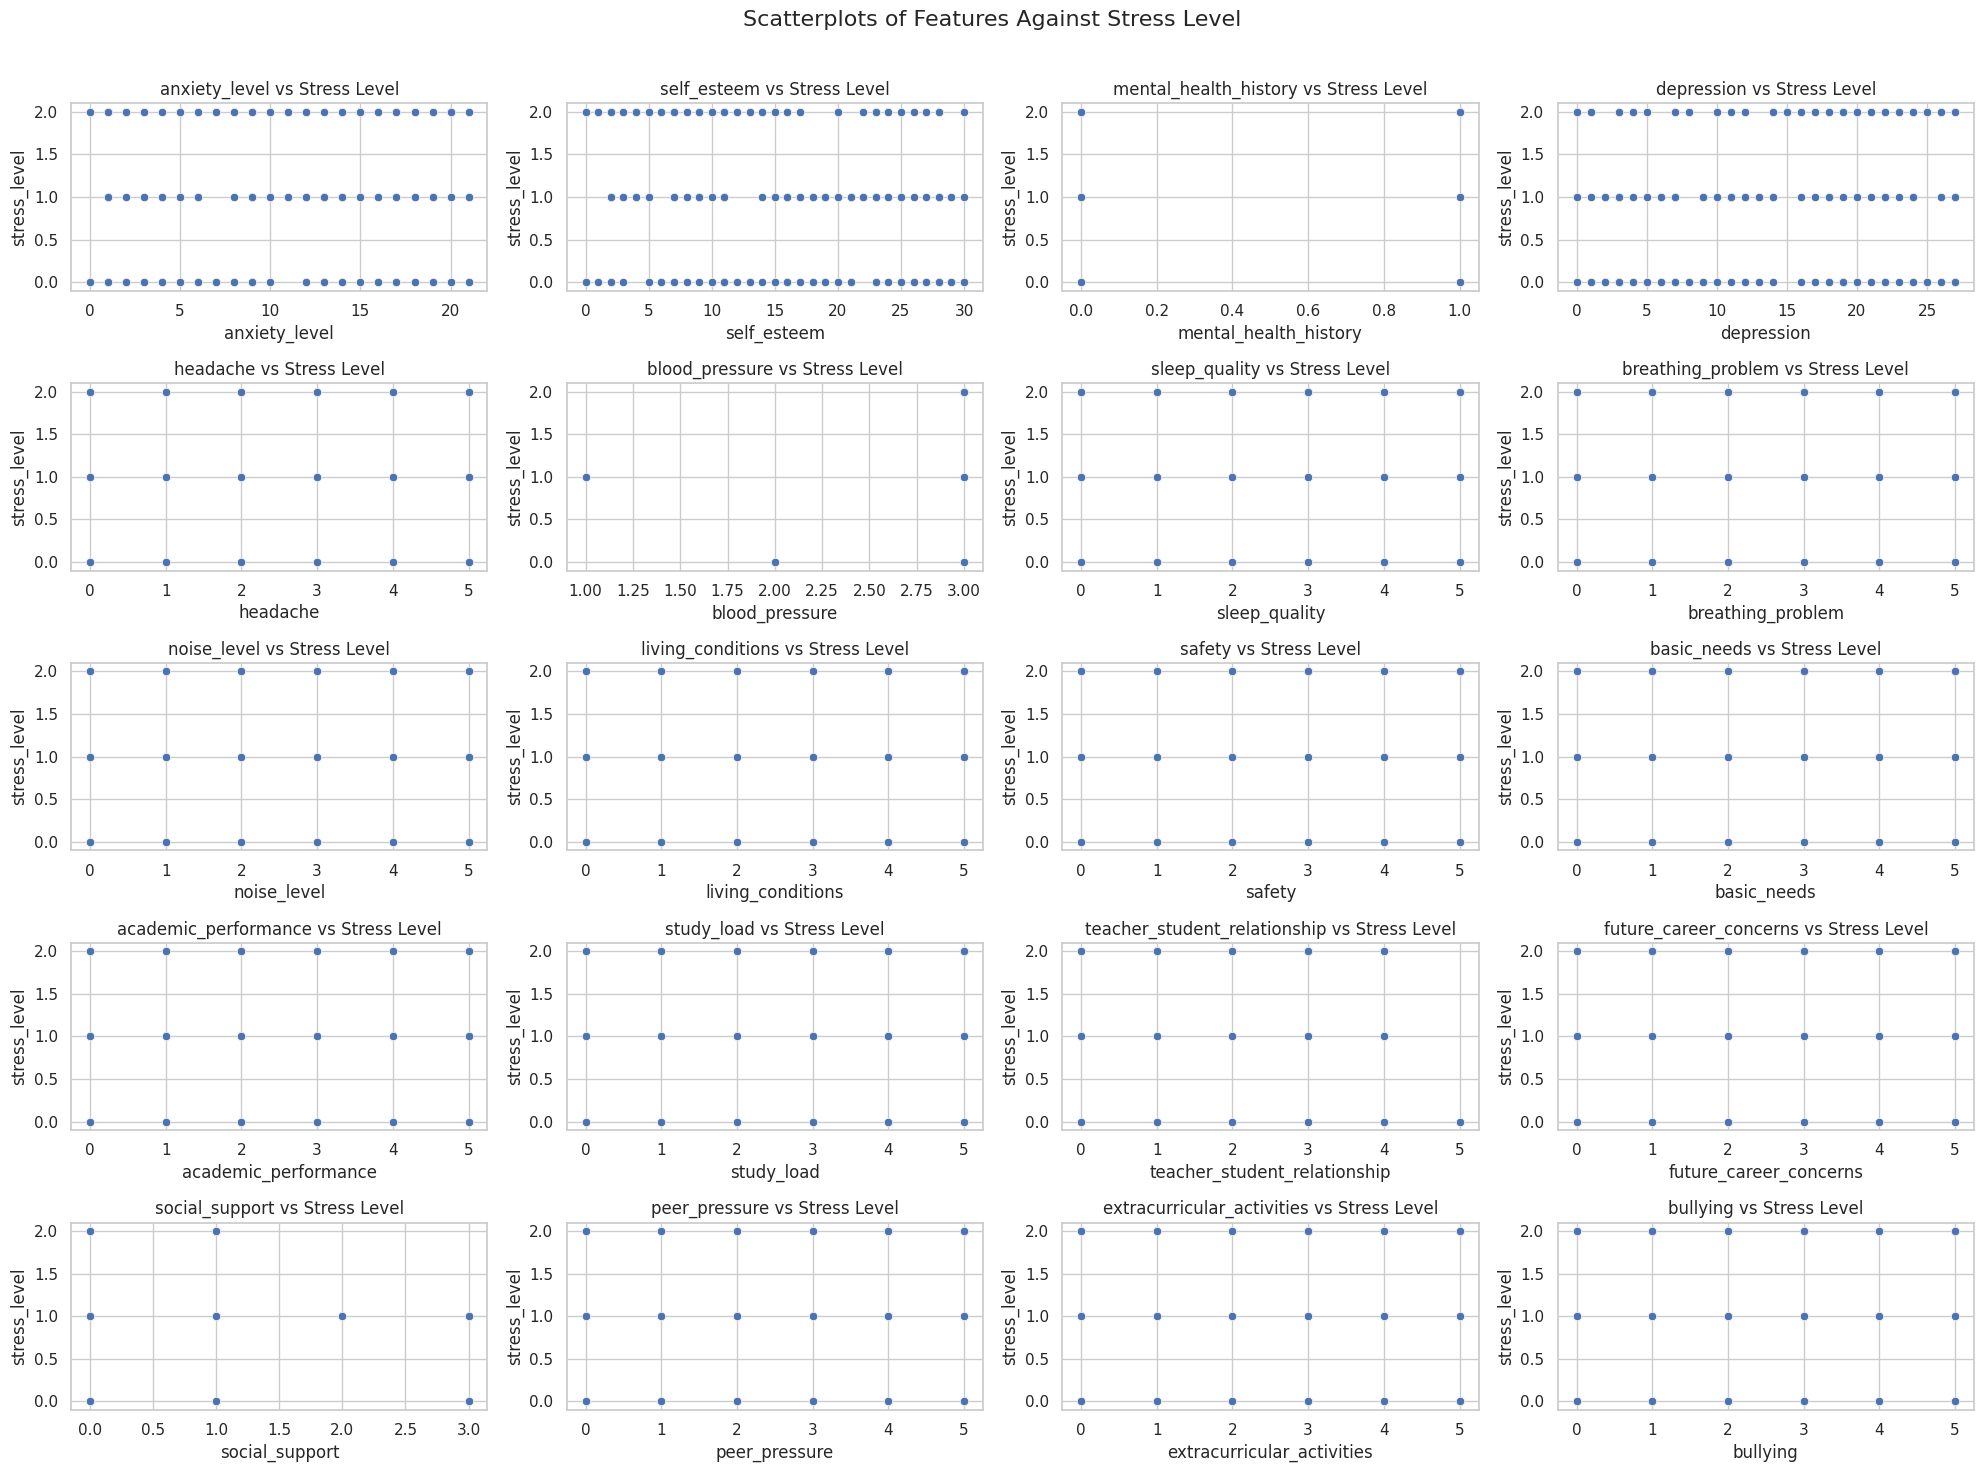

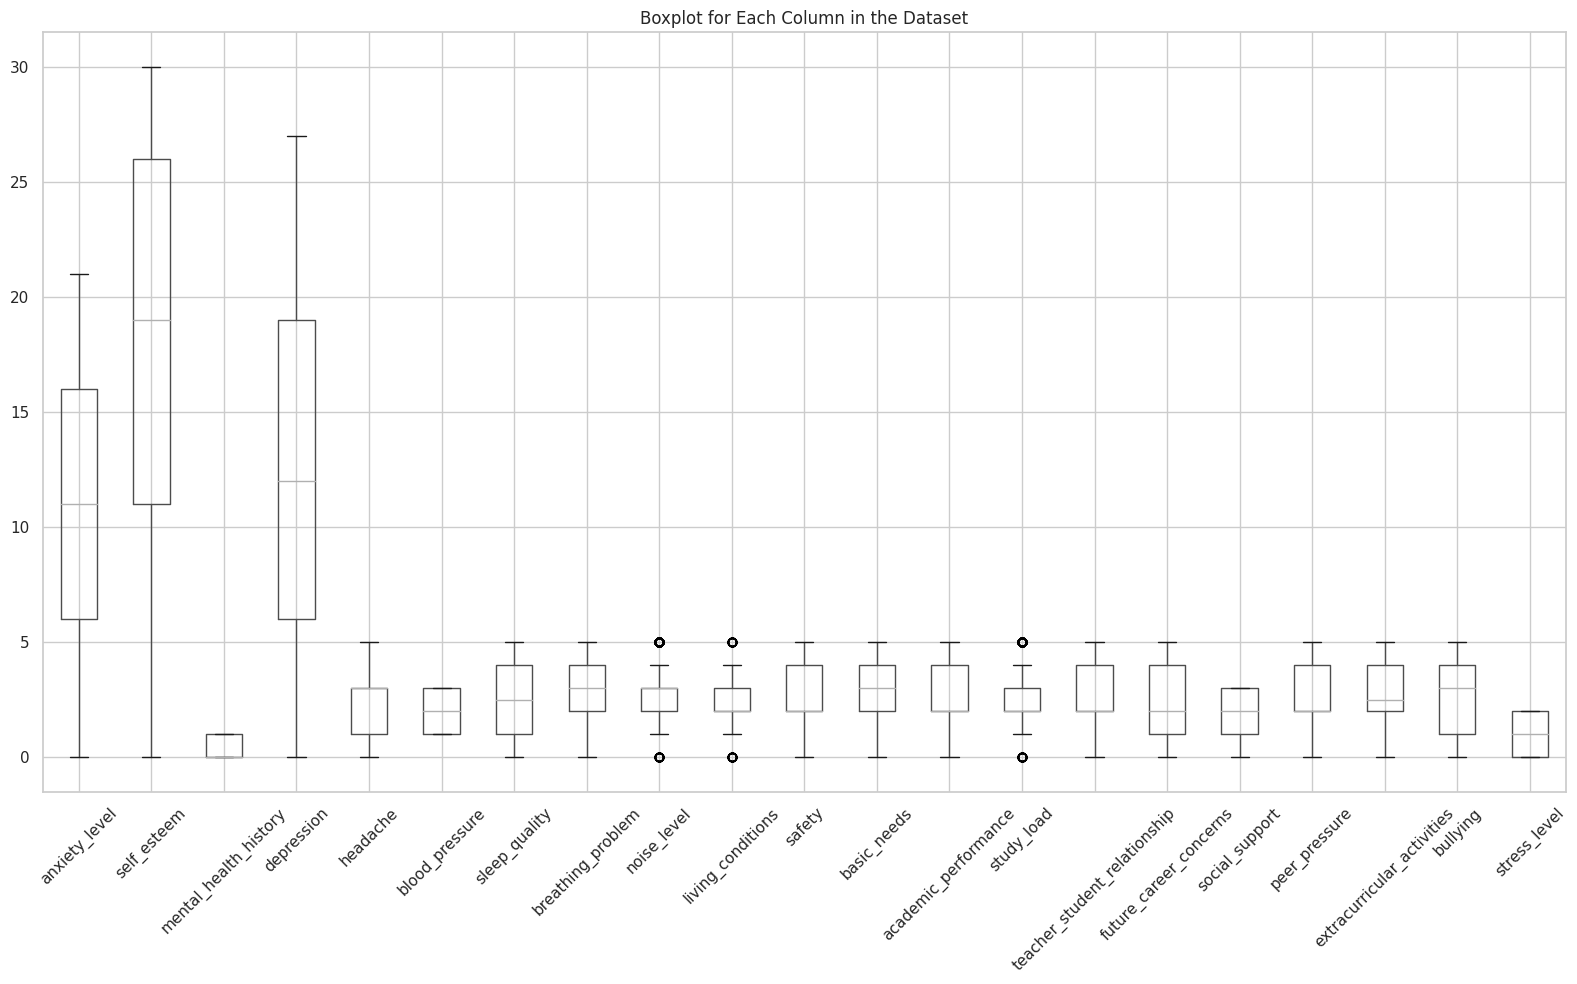

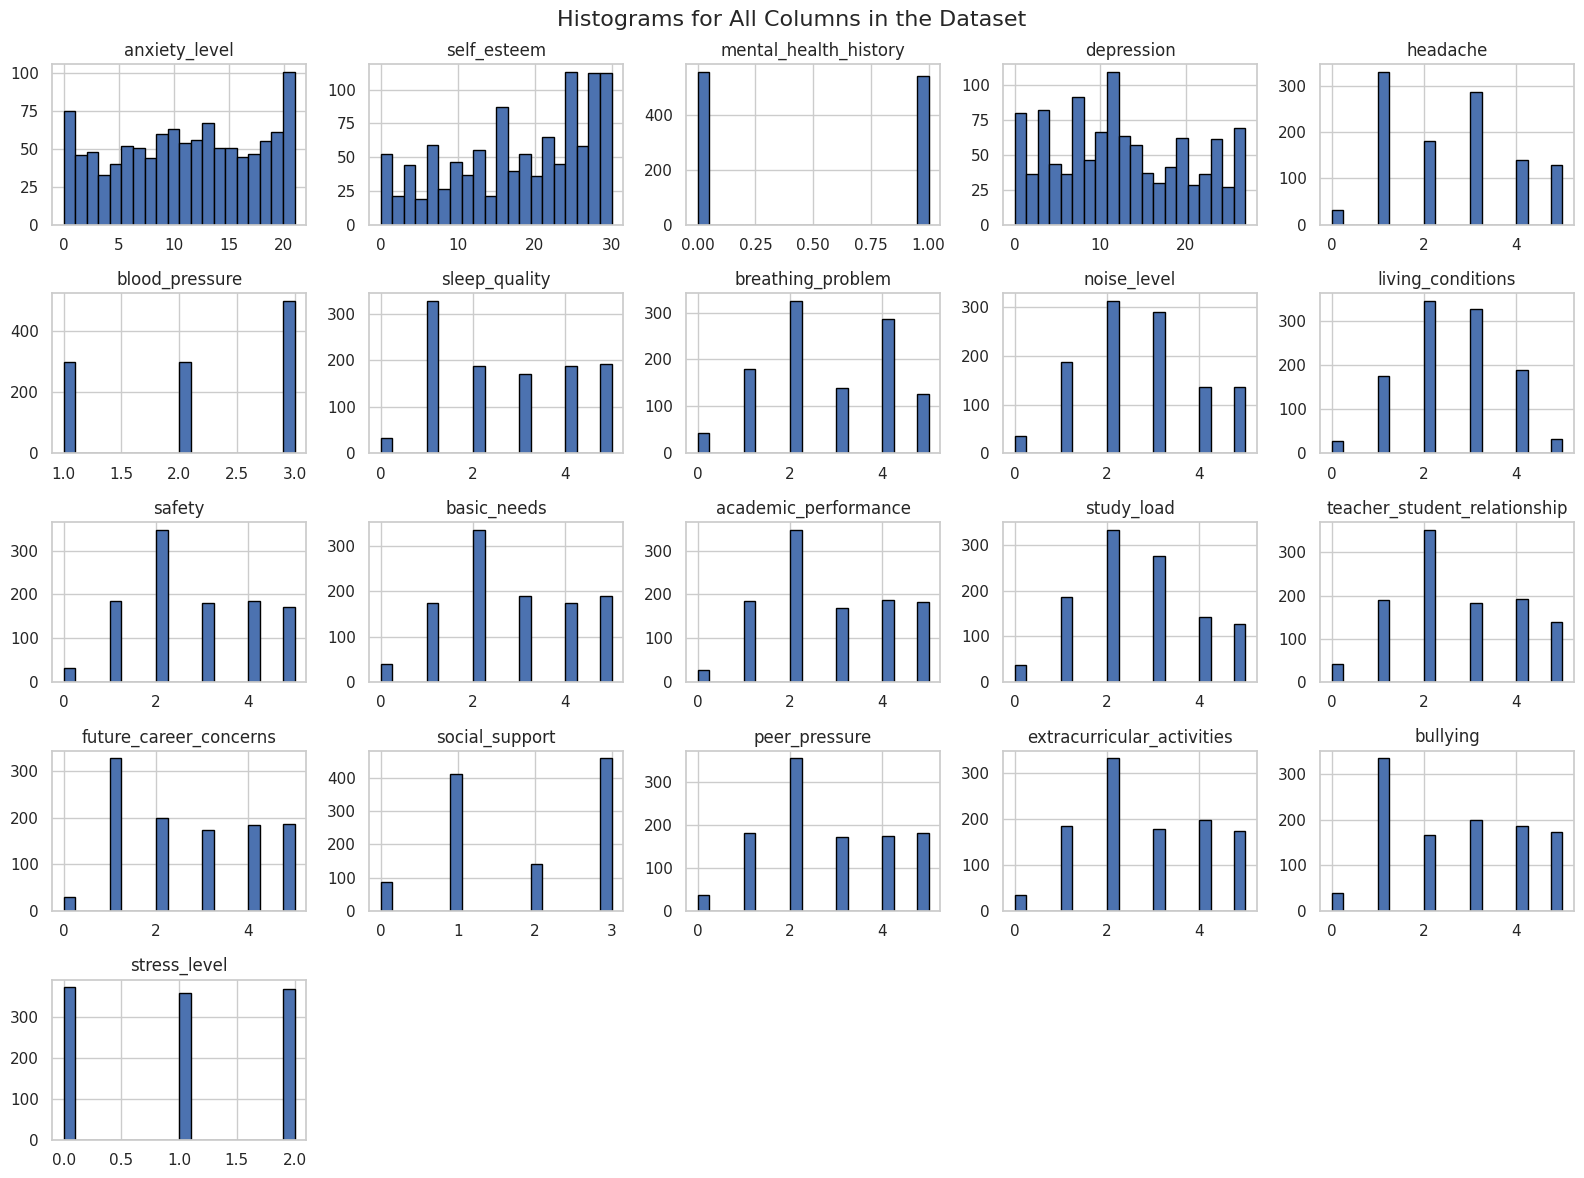

In [81]:
import seaborn as sns

sns.set(style="whitegrid")

num_features = df.shape[1] - 1
ncols = 4
nrows = (num_features // ncols) + (num_features % ncols > 0)

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 15))
fig.suptitle('Scatterplots of Features Against Stress Level', fontsize=16)

axes = axes.flatten()

for idx, column in enumerate(df.columns[:-1]):
    sns.scatterplot(x=df[column], y=df['stress_level'], ax=axes[idx])
    axes[idx].set_title(f'{column} vs Stress Level')

for idx in range(num_features, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
print("\n")

plt.figure(figsize=(16, 10))
df.boxplot(rot=90)
plt.title('Boxplot for Each Column in the Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\n")

df.hist(figsize=(16, 12), bins=20, edgecolor='black')
plt.suptitle('Histograms for All Columns in the Dataset', fontsize=16)
plt.tight_layout()
plt.show()


In [82]:
missing_values = df.isna().sum()
print("Missing values in each column")
print(missing_values)
print("\nTotal number of missing values: ",missing_values.sum())


Missing values in each column
anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

Total number of missing values:  0


In [83]:
def describe_with_central_tendencies(df):
    description = df.describe().T

    description['median'] = df.median()
    description['mode'] = df.mode().iloc[0]
    description['midrange'] = (df.min() + df.max()) / 2
    description['range'] = df.max() - df.min()
    description['variance'] = df.var()
    description['IQR'] = df.quantile(0.75) - df.quantile(0.25)

    return description

numeric_columns = df.select_dtypes(include=[np.number])
central_tendencies = describe_with_central_tendencies(numeric_columns)

print("\nCentral Tendencies for Numeric Columns:")
print(central_tendencies)


Central Tendencies for Numeric Columns:
                               count       mean       std  min   25%   50%  \
anxiety_level                 1100.0  11.063636  6.117558  0.0   6.0  11.0   
self_esteem                   1100.0  17.777273  8.944599  0.0  11.0  19.0   
mental_health_history         1100.0   0.492727  0.500175  0.0   0.0   0.0   
depression                    1100.0  12.555455  7.727008  0.0   6.0  12.0   
headache                      1100.0   2.508182  1.409356  0.0   1.0   3.0   
blood_pressure                1100.0   2.181818  0.833575  1.0   1.0   2.0   
sleep_quality                 1100.0   2.660000  1.548383  0.0   1.0   2.5   
breathing_problem             1100.0   2.753636  1.400713  0.0   2.0   3.0   
noise_level                   1100.0   2.649091  1.328127  0.0   2.0   3.0   
living_conditions             1100.0   2.518182  1.119208  0.0   2.0   2.0   
safety                        1100.0   2.737273  1.406171  0.0   2.0   2.0   
basic_needs            

In [84]:
import pandas as pd


# detect outliers using IQR
def detect_outliers_iqr(df, class_label):
    outliers = {}

    # Identify numerical columns, excluding the class label
    numerical_cols = df.select_dtypes(include='number').columns.difference([class_label])

    for column in numerical_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Identify outliers
        outlier_indices = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].index
        outliers[column] = outlier_indices.tolist()

    return outliers

# Detect outliers, excluding 'stress_level'
outliers = detect_outliers_iqr(df, 'stress_level')

# Display the outliers
print("Outliers detected in each column:")
for column, indices in outliers.items():
    if indices:
        print(f"{column}: {indices}")
    else:
        print(f"{column}: No outliers detected")



Outliers detected in each column:
academic_performance: No outliers detected
anxiety_level: No outliers detected
basic_needs: No outliers detected
blood_pressure: No outliers detected
breathing_problem: No outliers detected
bullying: No outliers detected
depression: No outliers detected
extracurricular_activities: No outliers detected
future_career_concerns: No outliers detected
headache: No outliers detected
living_conditions: [9, 114, 125, 184, 204, 220, 259, 278, 286, 290, 295, 312, 313, 320, 339, 360, 384, 393, 405, 437, 449, 475, 488, 493, 511, 516, 520, 521, 558, 571, 577, 583, 589, 592, 607, 648, 649, 675, 745, 752, 791, 809, 815, 825, 828, 857, 859, 861, 865, 884, 887, 919, 946, 984, 989, 1005, 1026, 1037, 1040, 1053, 1065, 1099]
mental_health_history: No outliers detected
noise_level: [9, 11, 21, 27, 29, 32, 38, 44, 64, 74, 75, 79, 82, 87, 91, 93, 94, 100, 111, 117, 128, 135, 137, 141, 153, 165, 171, 175, 178, 179, 192, 195, 200, 204, 208, 211, 234, 235, 236, 252, 259, 273, 27

In [85]:
import pandas as pd



# remove outliers using IQR
def remove_outliers_iqr(df, class_label):
    outlier_indices = set()  # Use a set to avoid duplicates

    # Identify numerical columns, excluding the class label
    numerical_cols = df.select_dtypes(include='number').columns.difference([class_label])

    for column in numerical_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Identify outliers
        outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].index
        outlier_indices.update(outliers)  # Add outliers to the set

    # Drop outliers from the DataFrame
    df_cleaned = df.drop(index=outlier_indices)

    return df_cleaned

# Remove outliers, excluding 'stress_level'
df_cleaned = remove_outliers_iqr(df, 'stress_level')

# Display the cleaned DataFrame
print("Cleaned DataFrame without outliers:")
print(df_cleaned)


Cleaned DataFrame without outliers:
      anxiety_level  self_esteem  mental_health_history  depression  headache  \
0                14           20                      0          11         2   
1                15            8                      1          15         5   
2                12           18                      1          14         2   
3                16           12                      1          15         4   
4                16           28                      0           7         2   
...             ...          ...                    ...         ...       ...   
1088             20           10                      1          18         3   
1092             13           20                      0           9         2   
1093              1           30                      0           4         1   
1095             11           17                      0          14         3   
1097              4           26                      0           3      

In [86]:
column_to_discretize = 'anxiety_level'
bin_edges = [0, 4, 9, 14, 21]
bin_labels = ['0-4', '5-9', '10-14', '15-21']

df['discretized_' + column_to_discretize] = pd.cut(df[column_to_discretize], bins=bin_edges, labels=bin_labels, include_lowest=True)

print("Original DataFrame:")
print(df[['anxiety_level', 'discretized_anxiety_level']])

Original DataFrame:
      anxiety_level discretized_anxiety_level
0                14                     10-14
1                15                     15-21
2                12                     10-14
3                16                     15-21
4                16                     15-21
...             ...                       ...
1095             11                     10-14
1096              9                       5-9
1097              4                       0-4
1098             21                     15-21
1099             18                     15-21

[1100 rows x 2 columns]


In [87]:
column_to_discretize = 'self_esteem'
bin_edges = [0, 15, 25, 30]
bin_labels = ['0-15', '16-25', '26-30']

df['discretized_' + column_to_discretize] = pd.cut(df[column_to_discretize], bins=bin_edges, labels=bin_labels, include_lowest=True)

print("Original DataFrame:")
print(df[['self_esteem', 'discretized_self_esteem']])

Original DataFrame:
      self_esteem discretized_self_esteem
0              20                   16-25
1               8                    0-15
2              18                   16-25
3              12                    0-15
4              28                   26-30
...           ...                     ...
1095           17                   16-25
1096           12                    0-15
1097           26                   26-30
1098            0                    0-15
1099            6                    0-15

[1100 rows x 2 columns]


In [88]:
column_to_discretize = 'depression'
bin_edges = [0, 4, 9, 14, 19, 27]
bin_labels = ['0-4', '5-9', '10-14', '15-19', '20-27']

df['discretized_' + column_to_discretize] = pd.cut(df[column_to_discretize], bins=bin_edges, labels=bin_labels, include_lowest=True)

print("Original DataFrame:")
print(df[['depression', 'discretized_depression']])

Original DataFrame:
      depression discretized_depression
0             11                  10-14
1             15                  15-19
2             14                  10-14
3             15                  15-19
4              7                    5-9
...          ...                    ...
1095          14                  10-14
1096           8                    5-9
1097           3                    0-4
1098          19                  15-19
1099          15                  15-19

[1100 rows x 2 columns]


In [89]:
from sklearn.preprocessing import MinMaxScaler
# Select only numeric columns for normalization
columns_to_normalize = df.select_dtypes(include=[np.number]).columns.tolist()


# Exclude the target variable and binary features from normalization
columns_to_normalize.remove('stress_level')  # Exclude the target variable
if 'mental_health_history' in columns_to_normalize:
    columns_to_normalize.remove('mental_health_history')  # Exclude the binary feature

# Create a MinMaxScaler instance
minmax_scaler = MinMaxScaler()

# Fit and transform the data
normalized_data_minmax = minmax_scaler.fit_transform(df[columns_to_normalize])

# Update the DataFrame with the normalized data
df[columns_to_normalize] = normalized_data_minmax

# Print the DataFrame with Min-Max scaled data
print("\nMin-Max scaled data:")
print(df.head())



Min-Max scaled data:
   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0       0.666667     0.666667                      0    0.407407       0.4   
1       0.714286     0.266667                      1    0.555556       1.0   
2       0.571429     0.600000                      1    0.518519       0.4   
3       0.761905     0.400000                      1    0.555556       0.8   
4       0.761905     0.933333                      0    0.259259       0.4   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0             0.0            0.4                0.8          0.4   
1             1.0            0.2                0.8          0.6   
2             0.0            0.4                0.4          0.4   
3             1.0            0.2                0.6          0.8   
4             1.0            1.0                0.2          0.6   

   living_conditions  ...  teacher_student_relationship  \
0                0.6  ...                

In [95]:
import pandas as pd

# Remove rows with NaN values from the DataFrame
df_cleaned = df.dropna()

# Inspect the DataFrame for non-numeric types
print("\nData types in the cleaned DataFrame:")
print(df_cleaned.dtypes)


# Calculate absolute correlations with the target variable 'stress_level'
correlation_with_target = df_encoded.corr()['stress_level'].abs().sort_values(ascending=False)

# Display correlations
print("\nCorrelation with Target Variable (stress_level):")
print(correlation_with_target)

# Set a higher threshold to filter features
threshold = 0.7
selected_features_corr = correlation_with_target[correlation_with_target > threshold].index.tolist()

# Remove the target variable from the selected features list
if 'stress_level' in selected_features_corr:
    selected_features_corr.remove('stress_level')

# Print selected features
print("\nSelected Features based on correlation:")
print(selected_features_corr)

# Create a new DataFrame with the selected features
X_final = df_encoded[selected_features_corr]

# Display the first few rows of the final DataFrame
print("\nFinal DataFrame with Selected Features:")
print(X_final.head())



Data types in the cleaned DataFrame:
anxiety_level                    float64
self_esteem                      float64
mental_health_history              int64
depression                       float64
headache                         float64
blood_pressure                   float64
sleep_quality                    float64
breathing_problem                float64
noise_level                      float64
living_conditions                float64
safety                           float64
basic_needs                      float64
academic_performance             float64
study_load                       float64
teacher_student_relationship     float64
future_career_concerns           float64
social_support                   float64
peer_pressure                    float64
extracurricular_activities       float64
bullying                         float64
stress_level                       int64
discretized_anxiety_level       category
discretized_self_esteem         category
discretized_depress